In [2]:
import seaborn as sns

In [3]:
df=sns.load_dataset('titanic')

In [4]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [6]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [9]:
#delete the rows or data point to handle missing values
df.shape

(891, 15)

In [ ]:
#but this will make lose of data

In [10]:
#column wise deletion axis=1
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


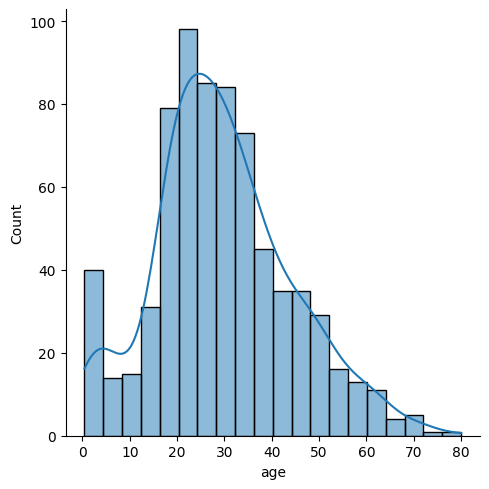

In [12]:
#imputation techniques
#Mean value imputation
sns.displot(df['age'],kde=True)

In [13]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [15]:
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [ ]:
#mean imputation works well when we have normal distribution

In [16]:
#median imputation -if we have outliers in the dataset like if the data is right or left skewed.
df['age_median']=df['age'].fillna(df['age'].median())
df[['age_median','age_mean','age']]

,age_median,age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


In [18]:
#mode imputation -categorical values
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [23]:
df['embarked'].isnull().sum()

np.int64(2)

In [24]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
mode_val=df[df['embarked'].notna()]['embarked'].mode()[0]

In [30]:
df['embarked_mode']=df['embarked'].fillna(mode_val)
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


**Handling** **Imbalanced** **Dataset**

In [37]:
#Handling Imbalanced Dataset ->upsampling and downsampling
#create a dummy dataset
import numpy as np
import pandas as pd

np.random.seed(123)

n_samples=1000
class_0_ratio=0.9
n_class_0=(int)(n_samples*class_0_ratio)
n_class_1=n_samples-n_class_0
# create a normal distribution
class_0=pd.DataFrame({
    'feature1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})
class_1=pd.DataFrame({
    'feature1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})
df=pd.concat([class_0,class_1]).reset_index(drop=True)
df

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [39]:
#upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [41]:
from sklearn.utils import resample #this basically resamples the data
df_minority_updated=resample(df_minority,replace=True, #sample with replacement so that different datapoint can get added
  n_samples=len(df_majority),  #-----> upsampling for downsampling vice versa
         random_state=42)

In [42]:
df_minority_updated

,feature1,feature2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1
...,...,...,...
952,1.188902,2.189189,1
965,3.919526,1.980541,1
976,2.810326,3.604614,1
942,3.621531,2.168229,1


**HANDLING IMBALANCED DATASET USING SMOTE-> #smote(synethetic Minority Over-sampling technique )is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synethic instances of the minority class by interpolating b/w existing instances.
\** **bold text**

In [ ]:
#in upsampling basically it created the data point similar to the exisiting so everything is similar meaning even the variance also the same
#but whereas in the smote it basically intepolerated b/w the data points that are already existing meaning it creates the data point b/w the data points so the varaince gets changes.


In [43]:
from sklearn.datasets import make_classification

In [44]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)

In [45]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [46]:
final_df['target'].value_counts()

,count
target,
0,900
1,100


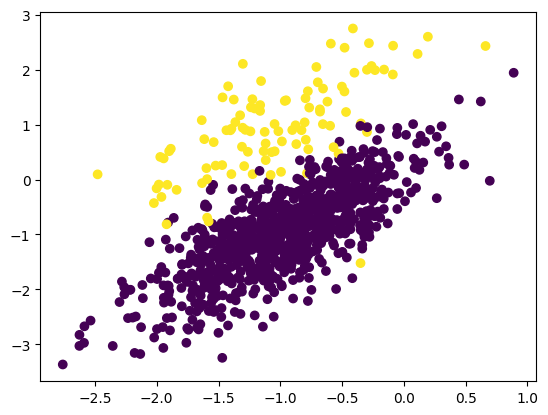

In [47]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [48]:
!pip install imblearn

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [51]:
X,y

(            f1        f2
 0    -0.762898 -0.706808
 1    -1.075436 -1.051162
 2    -0.610115 -0.909802
 3    -2.023284 -0.428945
 4    -0.812921 -1.316206
 ...        ...       ...
 1795 -1.075036  0.514962
 1796 -1.163673  1.268612
 1797 -1.933183 -0.172332
 1798 -1.920013 -0.094223
 1799 -1.400258  0.909713
 
 [1800 rows x 2 columns],
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 1795    1
 1796    1
 1797    1
 1798    1
 1799    1
 Name: target, Length: 1800, dtype: int64)

In [52]:
y.shape

(1800,)

In [53]:
X.shape

(1800, 2)

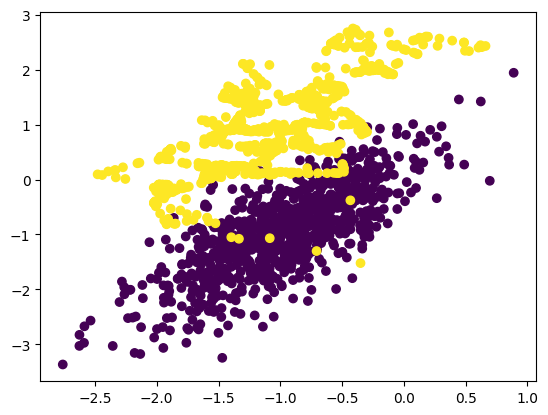

In [54]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

In [55]:
#HANDLING OUTLIERS
# can detect outliers using 5 number summary
import numpy as np

In [56]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum,Q1,median,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [57]:
minimum,Q1,median,Q3,maximum

(np.float64(32.0),
 np.float64(54.0),
 np.float64(67.0),
 np.float64(89.0),
 np.float64(99.0))

In [58]:
IQR=Q3-Q1
print(IQR)

35.0


In [59]:
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)
lower_fence,higher_fence

(np.float64(1.5), np.float64(141.5))

In [60]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]

<Axes: >

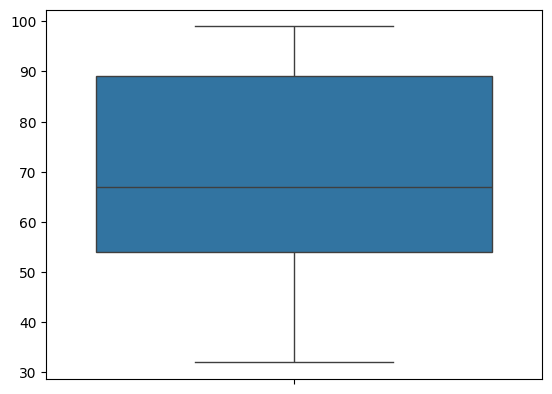

In [61]:
import seaborn as sns
sns.boxplot(lst_marks)

<Axes: >

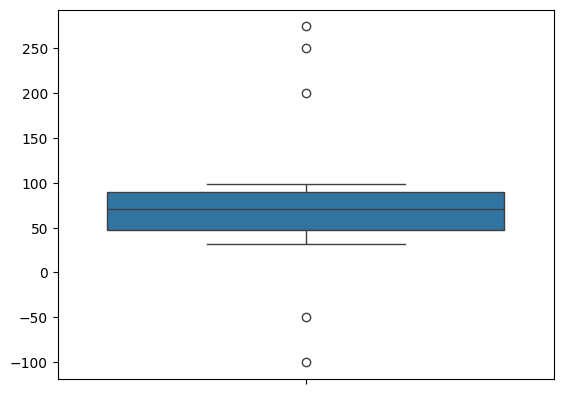

In [62]:
#now add some outliers
lst_marks=[-50,-100,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,200,274,250]
sns.boxplot(lst_marks)

In [ ]:
#DATA ENCODING
#categorical data to numerical values so the models understands this process is know encoding
# 3 methods
1.Nominal one hot encoding
2.Label and ordinal encoding
3. Target Guided ordinal encoding

Nominal/ One Hot endocin suppose I have a categorical values color=Red Blue Yellow I can have the feature vector[1,0,0] [0,1,0] [0,0,1] depends on the color

In [63]:
# do not use one hot encoding when you have too many categories.
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
df=pd.DataFrame({
    'color':['red','blue','green','red','blue']
})

In [64]:
df.head()

,color
0,red
1,blue
2,green
3,red
4,blue


In [67]:
encoder=OneHotEncoder()
encoded=encoder.fit_transform(df[['color']]).toarray()
encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [68]:
import pandas as pd
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
encoder_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


### Label Encoding
Label encoding and ordinal encoding are two techniques used to encode categorical data as numerical data.

Label encoding involves assigning a unique numerical label to each category in the variable. The labels are usually assigned in alphabetical order or based on the frequency of the categories. For example, if we have a categorical variable "color" with three possible values (red, green, blue), we can represent it using label encoding as follows:

1. Red: 1
2. Green: 2
3. Blue: 3

In [69]:
from sklearn.preprocessing import LabelEncoder
lb_encoder=LabelEncoder()
df.head()

,color
0,red
1,blue
2,green
3,red
4,blue


In [71]:
lb_encoder.fit_transform(df[['color']])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 2, 0])

In [ ]:
#but here is the problems the ml models may get confused with this cause it basically creates the labels based on the alaphabetical order, so if we want to have some weightage for every category we must ordinal

### Ordinal Encoding
It is used to encode categorical data that have an intrinsic order or ranking. In this technique, each category is assigned a numerical value based on its position in the order. For example, if we have a categorical variable "education level" with four possible values (high school, college, graduate, post-graduate), we can represent it using ordinal encoding as follows:

1. High school: 1
2. College: 2
3. Graduate: 3
4. Post-graduate: 4

In [72]:
from sklearn.preprocessing import OrdinalEncoder

In [73]:
df = pd.DataFrame({
    'size': ['small', 'medium', 'large', 'medium', 'small', 'large']
})

In [74]:
encoder=OrdinalEncoder(categories=[['small','medium','large']]) #we gave the order here

In [75]:
encoder.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

## Target Guided Ordinal Encoding
It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [76]:
import pandas as pd

# create a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

In [78]:
mean_price=df.groupby('city')['price'].mean().to_dict()
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [80]:
df['city_encoded']=df['city'].map(mean_price)
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


In [81]:
df[['price','city_encoded']]

,price,city_encoded
0,200,190.0
1,150,150.0
2,300,310.0
3,250,250.0
4,180,190.0
5,320,310.0
